**Task-02**

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

# Step 1: Import Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Configure visualization
sns.set(style='whitegrid')
plt.style.use('ggplot')


# Step 2: Load Data

In [102]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [103]:
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [104]:
print(test_data.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [89]:
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [105]:
print(test_data.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [106]:
train_data.shape

(891, 12)

In [92]:
test_data.shape

(418, 11)

In [107]:
print(train_data.tail())

     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


In [94]:
print(test_data.tail())

     PassengerId  Pclass                          Name     Sex   Age  SibSp  \
413         1305       3            Spector, Mr. Woolf    male   NaN      0   
414         1306       1  Oliva y Ocana, Dona. Fermina  female  39.0      0   
415         1307       3  Saether, Mr. Simon Sivertsen    male  38.5      0   
416         1308       3           Ware, Mr. Frederick    male   NaN      0   
417         1309       3      Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  
413      0           A.5. 3236    8.0500   NaN        S  
414      0            PC 17758  108.9000  C105        C  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416      0              359309    8.0500   NaN        S  
417      1                2668   22.3583   NaN        C  


# Step 3: Data Cleaning


In [108]:
# Check for missing values
print(train_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [109]:
# Check for missing values
print(test_data.isnull().sum())


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [98]:

# Fill missing 'Age' with median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most frequent value
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to too many missing values
train_data.drop(columns='Cabin', inplace=True)

# Check for any remaining missing values
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [110]:
# Fill missing 'Age' with median
test_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most frequent value
test_data['Fare'].fillna(test_data['Fare'].mode()[0], inplace=True)

# Drop 'Cabin' due to too many missing values
test_data.drop(columns='Cabin', inplace=True)

# Check for any remaining missing values
print(test_data.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Step 4: Exploratory Data Analysis (EDA)


In [7]:
# 4.1 Overview of the Data
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
m

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>]], dtype=object)

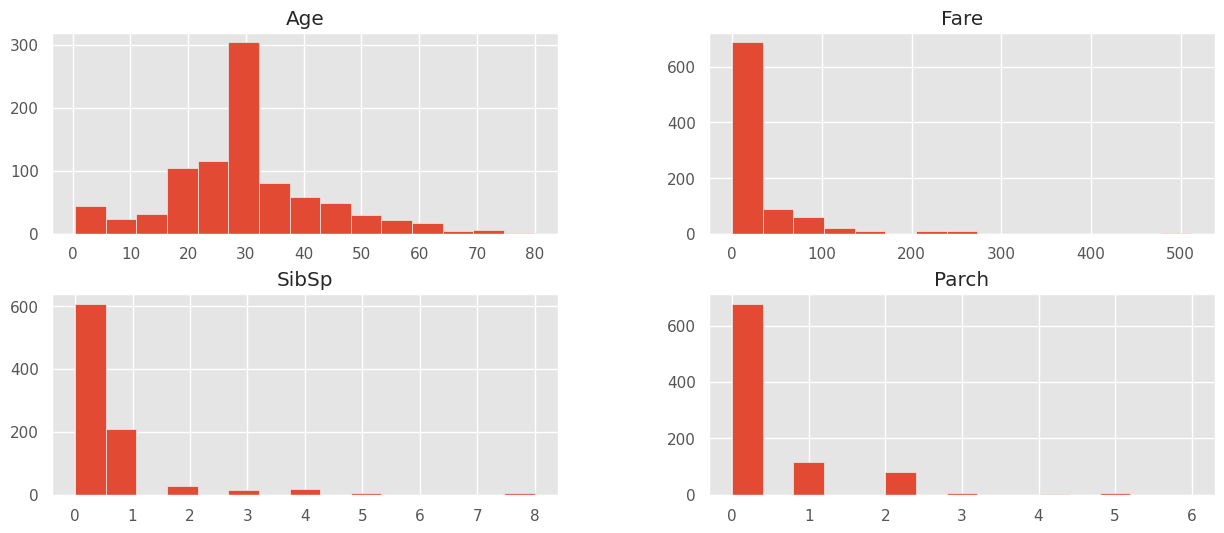

In [8]:
# 4.2 Distribution of Numerical Features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
train_data[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 2))

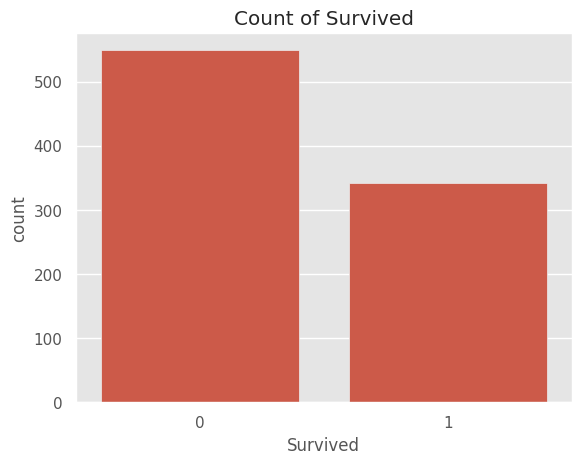

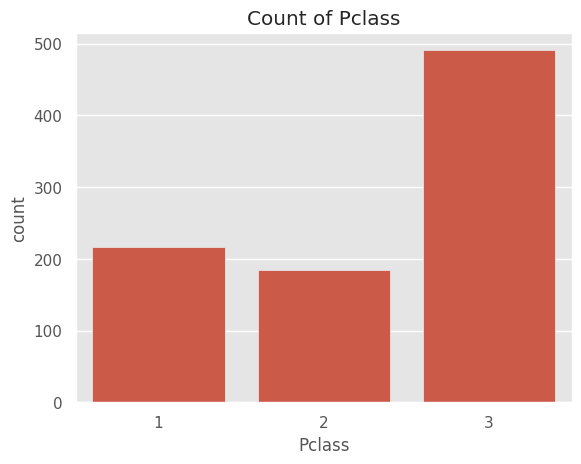

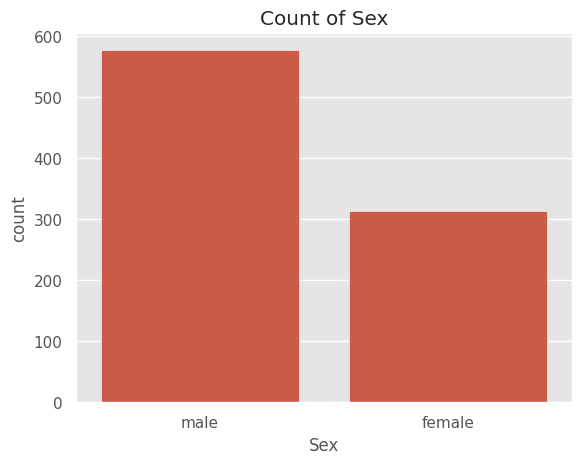

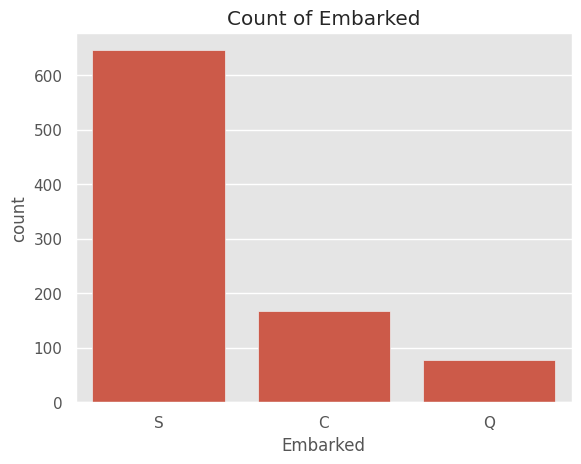

In [9]:
# 4.3 Countplot for Categorical Features
categorical_features = ['Survived', 'Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    sns.countplot(x=feature, data=train_data)
    plt.title(f'Count of {feature}')
    plt.show()

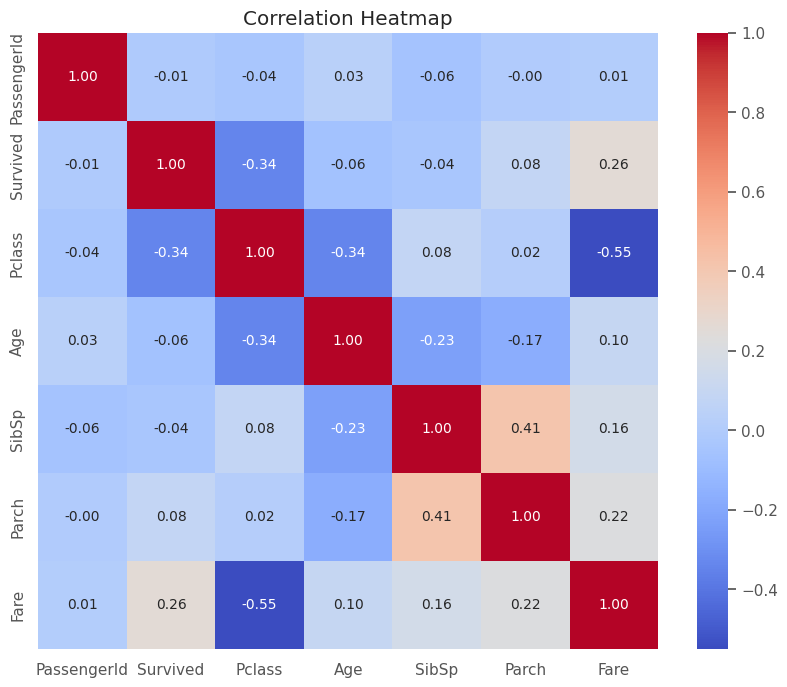

In [19]:
# 4.4 Correlation Heatmap
# Select only numeric columns for correlation matrix
numeric_columns = train_data.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


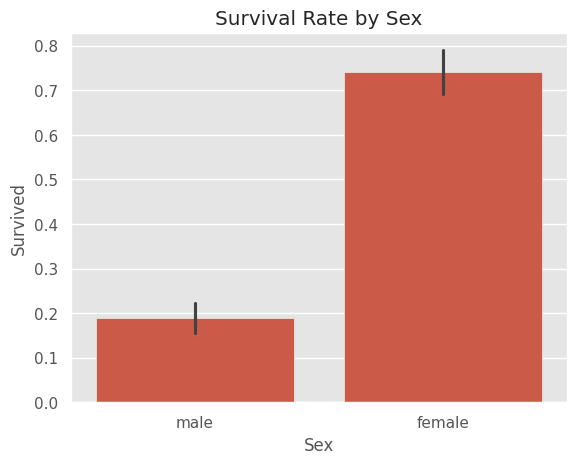

In [11]:
# 4.5 Survival Rate by Sex
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Sex')
plt.show()

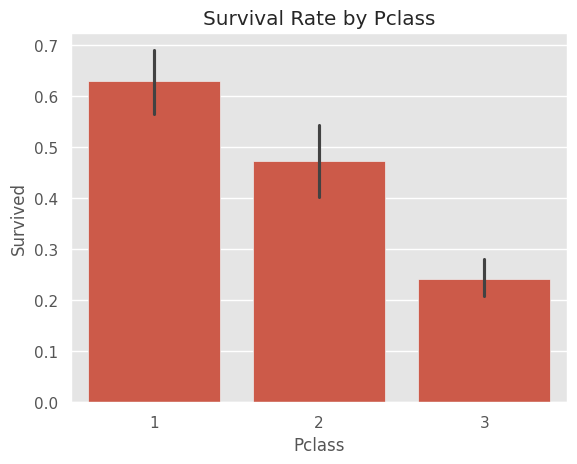

In [12]:
# 4.6 Survival Rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Pclass')
plt.show()

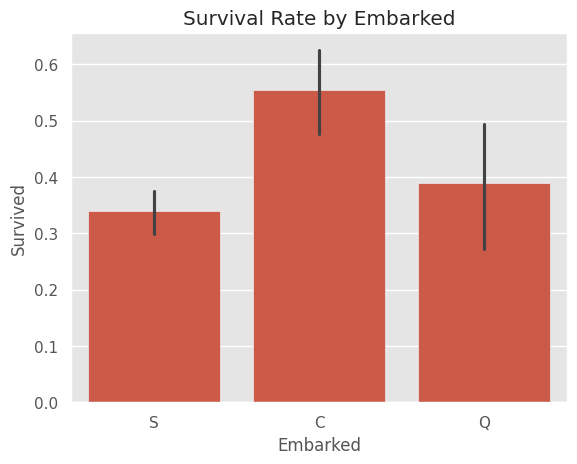

In [13]:
# 4.7 Survival Rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.title('Survival Rate by Embarked')
plt.show()

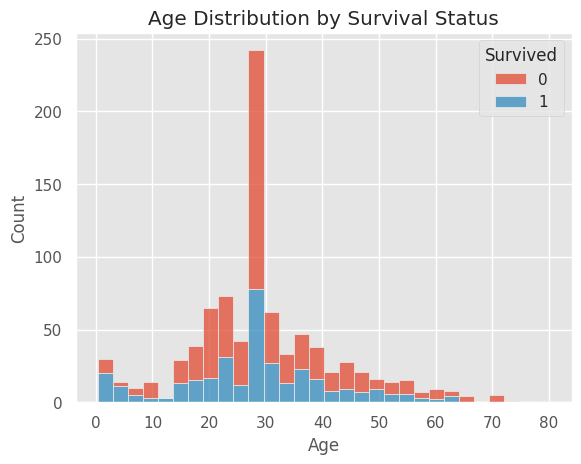

In [14]:
# 4.8 Age Distribution by Survival Status
sns.histplot(data=train_data, x='Age', hue='Survived', multiple='stack')
plt.title('Age Distribution by Survival Status')
plt.show()


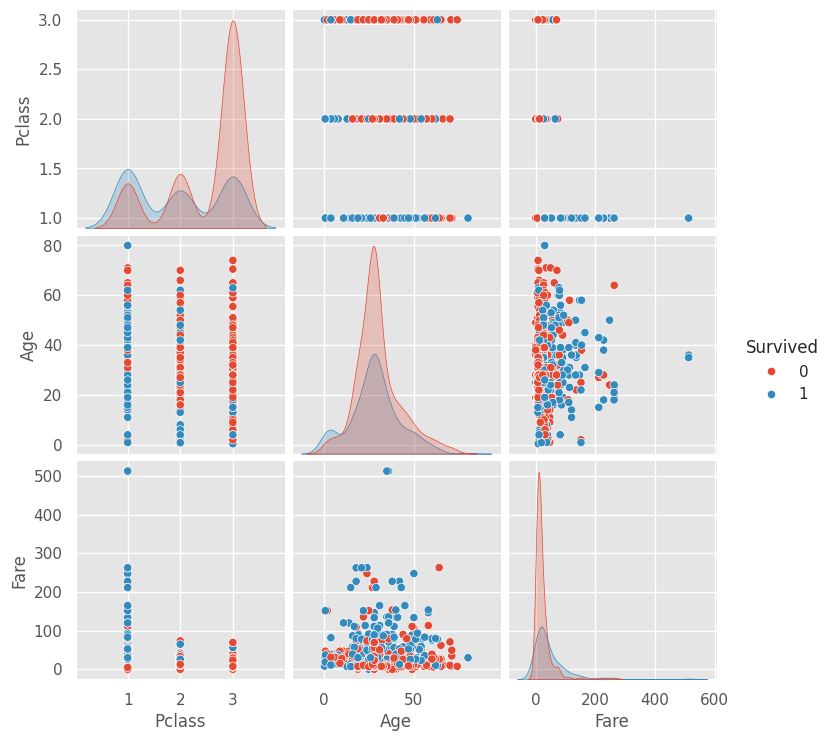

In [15]:
# 4.9 Pairplot for Selected Features
selected_features = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
sns.pairplot(train_data[selected_features], hue='Survived', diag_kind='kde')
plt.show()


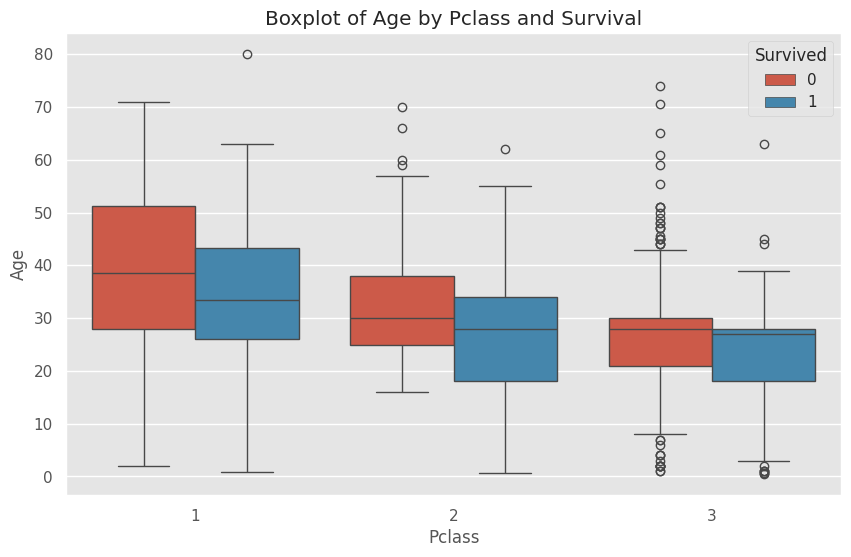

In [16]:
# 4.10 Boxplot of Age by Pclass and Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train_data)
plt.title('Boxplot of Age by Pclass and Survival')
plt.show()
